In [1]:
%config InlineBackend.figure_format = 'retina'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from ripple.waveforms.IMRPhenomD import gen_IMRPhenomD_polar
from ripple import ms_to_Mc_eta
import jax.numpy as jnp
from likelihood.detector_preset import * 
from likelihood.detector_projection import * 
from likelihood.ripple_projection import *

In [3]:
# define center of time array
tgps_geo = 1126259462.423

# define sampling rate and duration
fsamp = 8192
duration = 8

delta_t = 1/fsamp
tlen = int(round(duration / delta_t))
freqs = np.fft.rfftfreq(tlen, delta_t)
delta_f = freqs[1] - freqs[0]

In [13]:
# Now lets compute the waveform ripple
m1 = 20.0
m2 = 10.0
Mc, eta = ms_to_Mc_eta(jnp.array([m1, m2]))
chi1 = 0.0
chi2 = 0.0
D = 100.0
tc = 4
phic = 0.0
inclination = np.pi/2
psi = np.pi/2
ra = 0.0
dec = 0.0
fmin = 30

f_list = freqs[freqs>fmin]

In [14]:
params = {'Mc': Mc, 'eta': eta, 'chi1': chi1, 'chi2': chi2, 'D': D, 't_c': tc, 'phic': phic, 'inclination': inclination, 'psi': psi, 'ra': ra, 'dec': dec}
detector_presets = {'H1': get_H1(), 'L1': get_L1()}

data = get_detector_response_ripple(f_list, params, detector_presets)

print(data['H1'])
print(data['L1'])

[-1.32206759e-23+7.30087875e-25j  9.49304584e-24+9.13380793e-24j
  9.20372794e-26-1.31067053e-23j ... -1.20874362e-39+2.44167975e-39j
  1.19560990e-39-2.44528041e-39j -1.18247103e-39+2.44881322e-39j]
[-4.87368442e-24-3.46678136e-23j -2.17589257e-23+2.71983673e-23j
  3.45109043e-23-3.15666494e-24j ...  7.19988185e-39+2.30062849e-40j
 -7.19530614e-39-1.45099953e-40j  7.18973522e-39+6.02767945e-41j]


/usr/local/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


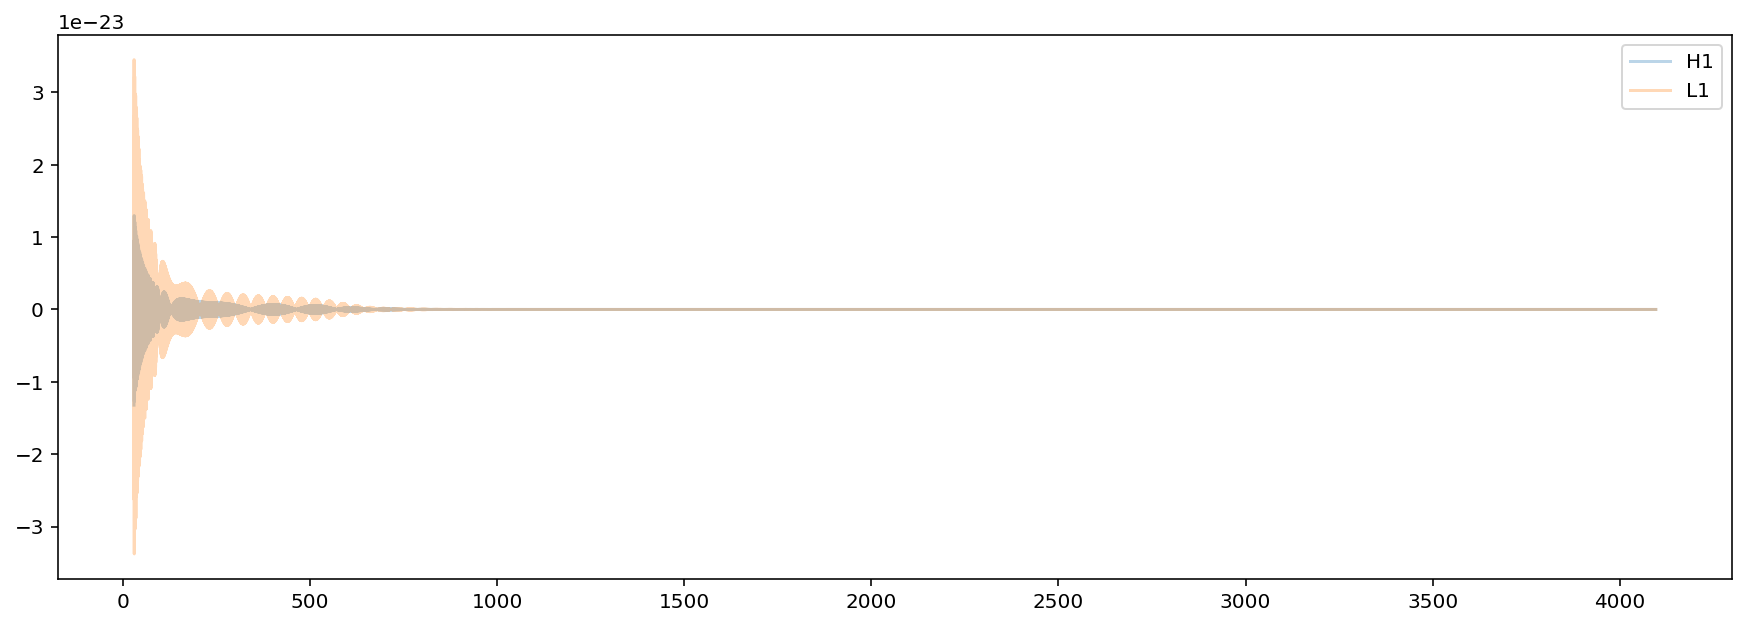

In [17]:
plt.figure(figsize=(15,5))
plt.plot(f_list, data['H1'], label='H1', alpha=0.3)
plt.plot(f_list, data['L1'], label='L1', alpha=0.3)
plt.legend()